# Gym Taxi-v2 Environment

### Import the dependencies

* Numpy - a library of linear algebra
* Gym - a library of environments
* Random - a library which helps us to generate random numbers
* Matplotlib - a plotting library

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('Taxi-v2')

### Create the Q-table and initialize it  

* env.action_space.n - number of actions, which provides our environment
* env.observation_space.n - number of states, which provides our environment

In [3]:
action_size = env.action_space.n
state_size = env.observation_space.n

print("Action size =", action_size)
print("State size =", state_size)

Action size = 6
State size = 500


In [4]:
qtable = np.zeros((state_size, action_size))

### Create the hyperparameters

In [5]:
total_train_episodes = 50000  # Total episodes, which we will use to train our algorithm
total_test_episodes = 100     # Total episodes, which we will use to test our algorithm
max_steps = 100               # Max time steps per episode

learning_rate = 0.7
gamma = 0.8                   # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0                 # Exploration probability at start 
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.002             # Exponential decay rate for exploration probability

### The Q learning algorithm

In [6]:
rewards = []
best_avg_reward = 0

for episode in range(total_train_episodes):
    # Reset the environment
    state = env.reset()      # reset() returns an initial observation
    total_rewards = 0
    
    for step in range(max_steps):
        # First we randomize a number
        tradeoff = random.uniform(0, 1) # The tradeoff between exploration and explotation
        
        # If this number is greater than epsilon, then we do exploitation (taking the biggest Q value for this state)
        if tradeoff > epsilon:
            action = np.argmax(qtable[state, :]) # numpy.argmax returns the indices of the maximum values along an axis
        
        # Else doing a random choice
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and a reward(r)
        new_state, reward, done, _ = env.step(action)
        
        # Update Q(s, a)
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # Calculate total rewards for an episode
        total_rewards = total_rewards + reward
        
        if done:
            break
            
    rewards.append(total_rewards)
    
    if episode >= 100:
        avg_reward = np.mean(rewards[episode-99:episode+1])
        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
        
            
    
    episode += 1
    
    # Reduce epsilon (because we need less and less exploration, and more and more explotation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
    
print("Best average reward is", best_avg_reward)

Best average reward is 9.31


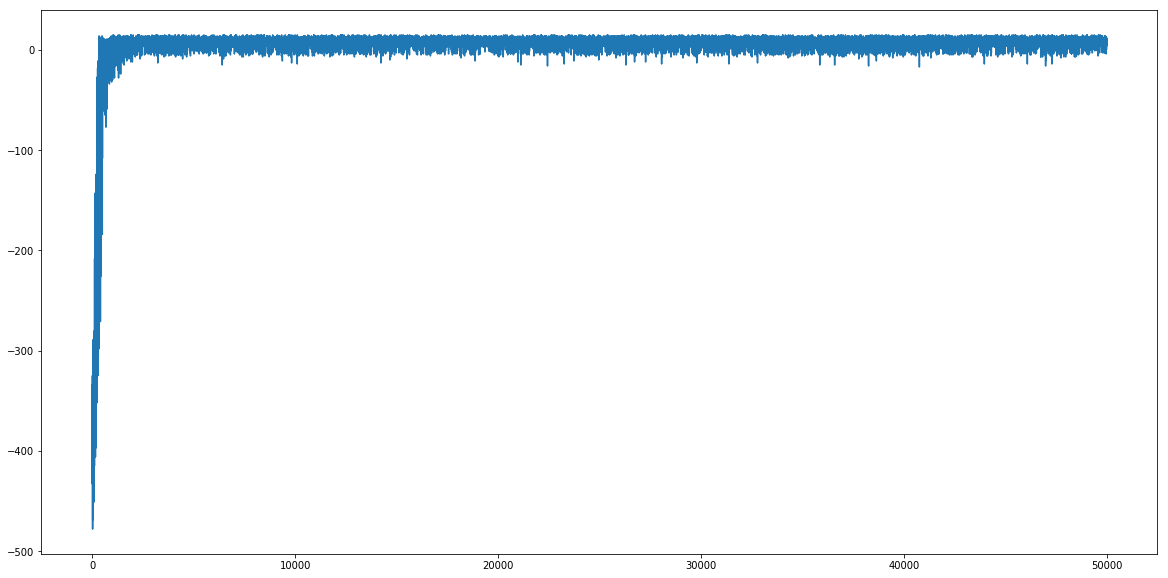

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(rewards)
plt.show()

### Use our trained Q-table to play Taxi

In [8]:
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    total_rewards = 0
    
    for step in range(max_steps):
        # Take the action (index), that have the maximum expected future reward given that state
        action = np.argmax(qtable[state, :])
        
        new_state, reward, done, _ = env.step(action)
        
        total_rewards += reward
        
        if done:
            break
        
        state = new_state
        
    rewards.append(total_rewards)

env.close()
print("Score over time: " + str(sum(rewards) / total_test_episodes))

Score over time: 8.63
